# Assignment 2 - Ridge Regression from Scratch

Building ridge regression without using Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Step 1: Load and Clean Data

In [2]:
# Load band gap data
bgdata = pd.read_json('../data/band_gap_data.json')
print(f"Total rows: {len(bgdata)}")
bgdata.head()

Total rows: 1459


,chemical_formula,crystallinity,band_gap,band_gap_units,band_gap_type,temperature_K,exp_method,data_type
0,Li1F1,Single crystalline,13.60,eV,Direct,300.0,Reflection,EXPERIMENTAL
1,Li1F1,Single crystalline,12.61,eV,Excitonic,300.0,Reflection,EXPERIMENTAL
2,Li1F1,Single crystalline,12.60,eV,Excitonic,NaN,Estimated,EXPERIMENTAL
3,Li1F1,Single crystalline,12.10,eV,None,77.0,Absorption,EXPERIMENTAL
4,Li1F1,Single crystalline,12.00,eV,None,200.0,Absorption,EXPERIMENTAL


In [3]:
# Check for missing values
print("Missing values per column:")
print(bgdata.isnull().sum())

Missing values per column:
chemical_formula      0
crystallinity       174
band_gap             12
band_gap_units       12
band_gap_type       863
temperature_K       239
exp_method          141
data_type            12
dtype: int64


In [4]:
# Remove rows with missing data in the columns we need
bgdata = bgdata.dropna(subset=['crystallinity', 'band_gap_type', 'exp_method', 'temperature_K', 'band_gap'])

print(f"Data shape after removing missing values: {bgdata.shape}")

Data shape after removing missing values: (412, 8)


## Step 2: Keep Only Relevant Columns

In [5]:
# Keep only the columns we need
bgdata = bgdata[['crystallinity', 'band_gap_type', 'exp_method', 'temperature_K', 'band_gap']]

print("Columns we're working with:")
print(bgdata.columns.tolist())
print(f"\nShape: {bgdata.shape}")
bgdata.head()

Columns we're working with:
['crystallinity', 'band_gap_type', 'exp_method', 'temperature_K', 'band_gap']

Shape: (412, 5)


,crystallinity,band_gap_type,exp_method,temperature_K,band_gap
0,Single crystalline,Direct,Reflection,300.0,13.60
1,Single crystalline,Excitonic,Reflection,300.0,12.61
12,Polycrystalline,Excitonic,Absorption,4.7,5.62
13,Single crystalline,Excitonic,Absorption,80.0,5.90
16,Single crystalline,Excitonic,Reflection,300.0,10.39


## Step 3: One-Hot Encoding for Categorical Features

In [6]:
# Check unique values for categorical columns
print("Unique values in crystallinity:")
print(bgdata['crystallinity'].unique())
print(f"\nUnique values in band_gap_type:")
print(bgdata['band_gap_type'].unique())
print(f"\nUnique values in exp_method:")
print(bgdata['exp_method'].unique())

Unique values in crystallinity:
['Single crystalline' 'Polycrystalline' 'Amorphous']

Unique values in band_gap_type:
['Direct' 'Excitonic' 'Indirect' 'G6 to G8']

Unique values in exp_method:
['Reflection' 'Absorption' 'APW' 'Photoconduction' 'Electroreflection'
 'Estimated' 'Thermal activation' 'Magnetoabsorption' 'Magnetoreflection']


In [7]:
# Create one-hot encoded features
crys_dummies = pd.get_dummies(bgdata['crystallinity'], prefix='crys')
band_gap_type_dummies = pd.get_dummies(bgdata['band_gap_type'], prefix='bg_type')
exp_method_dummies = pd.get_dummies(bgdata['exp_method'], prefix='exp')

print("One-hot encoded columns:")
print(f"Crystallinity: {crys_dummies.columns.tolist()}")
print(f"Band gap type: {band_gap_type_dummies.columns.tolist()}")
print(f"Exp method: {exp_method_dummies.columns.tolist()}")

One-hot encoded columns:
Crystallinity: ['crys_Amorphous', 'crys_Polycrystalline', 'crys_Single crystalline']
Band gap type: ['bg_type_Direct', 'bg_type_Excitonic', 'bg_type_G6 to G8', 'bg_type_Indirect']
Exp method: ['exp_APW', 'exp_Absorption', 'exp_Electroreflection', 'exp_Estimated', 'exp_Magnetoabsorption', 'exp_Magnetoreflection', 'exp_Photoconduction', 'exp_Reflection', 'exp_Thermal activation']


In [8]:
# Combine all features into one dataframe
features = pd.concat([crys_dummies, band_gap_type_dummies, exp_method_dummies, bgdata[['temperature_K']]], axis=1)
target = bgdata['band_gap']

print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")
print(f"\nFeature columns:")
print(features.columns.tolist())

Features shape: (412, 17)
Target shape: (412,)

Feature columns:
['crys_Amorphous', 'crys_Polycrystalline', 'crys_Single crystalline', 'bg_type_Direct', 'bg_type_Excitonic', 'bg_type_G6 to G8', 'bg_type_Indirect', 'exp_APW', 'exp_Absorption', 'exp_Electroreflection', 'exp_Estimated', 'exp_Magnetoabsorption', 'exp_Magnetoreflection', 'exp_Photoconduction', 'exp_Reflection', 'exp_Thermal activation', 'temperature_K']


## Step 4: Correlation Matrix

In [9]:
# Combine features and target for correlation analysis
full_data = pd.concat([features, target], axis=1)

# Calculate Pearson correlation
correlation_matrix = full_data.corr(method='pearson')

print("Correlation with band_gap (target):")
print(correlation_matrix['band_gap'].sort_values(ascending=False))

Correlation with band_gap (target):
band_gap                   1.000000
bg_type_Excitonic          0.539006
exp_Reflection             0.265381
exp_APW                    0.120629
exp_Photoconduction        0.029363
exp_Estimated              0.021237
crys_Polycrystalline       0.020337
crys_Single crystalline   -0.011706
crys_Amorphous            -0.015998
exp_Electroreflection     -0.021366
bg_type_G6 to G8          -0.044840
temperature_K             -0.052675
exp_Thermal activation    -0.076740
exp_Magnetoreflection     -0.090989
exp_Absorption            -0.114620
bg_type_Direct            -0.164710
exp_Magnetoabsorption     -0.195942
bg_type_Indirect          -0.197299
Name: band_gap, dtype: float64


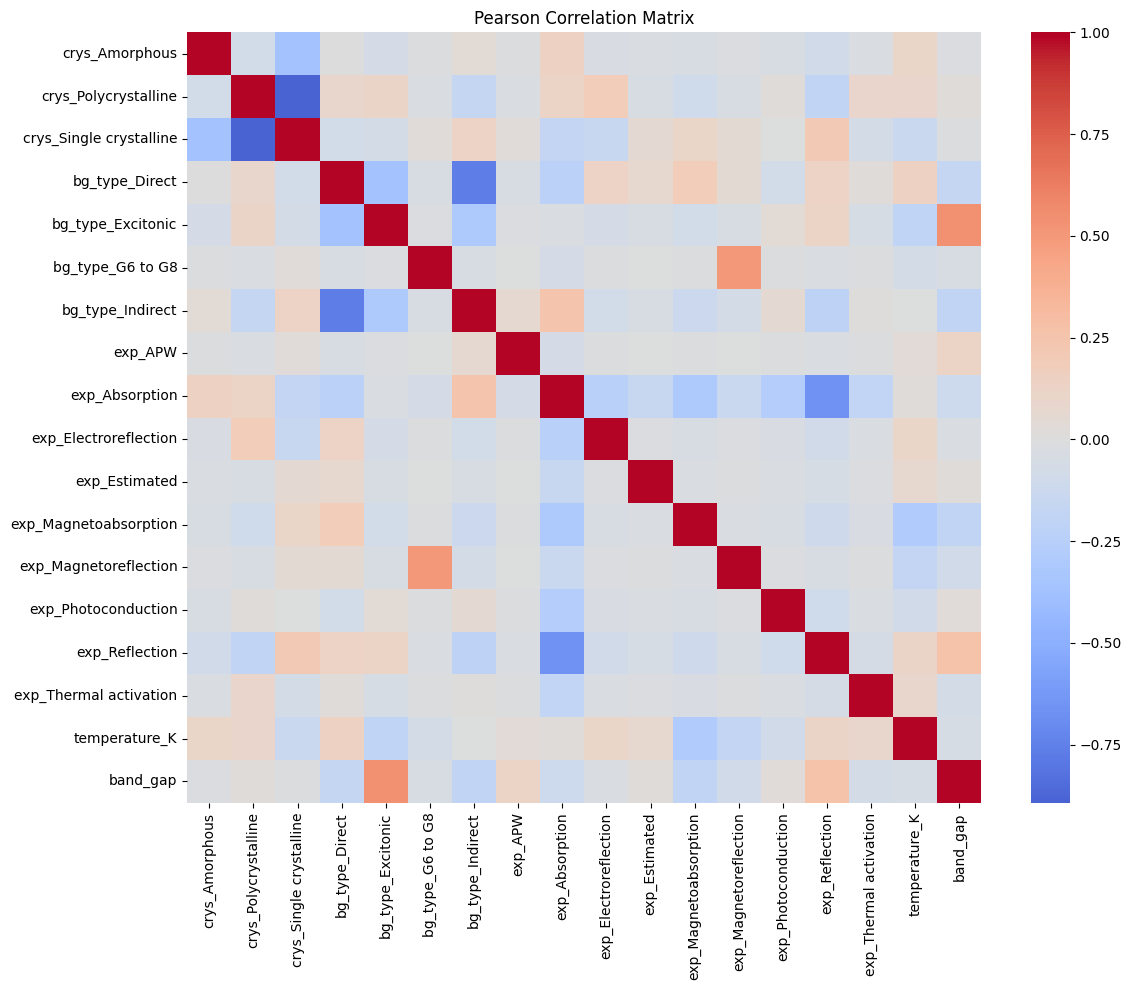

Correlation matrix saved!


In [10]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.savefig('../results/figures/correlation_matrix.png', dpi=150)
plt.show()

print("Correlation matrix saved!")

### Observations about correlations:

Looking at the correlation matrix, we can see:
- Temperature has a weak correlation with band_gap
- Some categorical features show stronger correlations than others
- There's not a lot of strong correlation between features and the target, which might make prediction challenging

## Step 5: Train/Test Split (80/20)

In [11]:
# Convert to numeric types first (important for matrix operations)
features = features.astype(float)
target = target.astype(float)

# Manual train/test split
np.random.seed(42)  # For reproducibility

# Shuffle indices
indices = np.random.permutation(len(features))

# Split at 80%
split_idx = int(0.8 * len(features))

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Create train and test sets
X_train = features.iloc[train_indices].values
X_test = features.iloc[test_indices].values
y_train = target.iloc[train_indices].values
y_test = target.iloc[test_indices].values

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train/Test split: {len(train_indices)}/{len(test_indices)}")
print(f"\nData types: X_train={X_train.dtype}, y_train={y_train.dtype}")

Training set: (329, 17)
Test set: (83, 17)
Train/Test split: 329/83

Data types: X_train=float64, y_train=float64


## Step 6: Ridge Regression Implementation

Ridge regression formula: w = (X^T X + αI)^(-1) X^T y

In [12]:
def ridge_regression(X, y, alpha):
    """
    Train ridge regression manually.
    
    Formula: w = (X^T X + alpha*I)^(-1) X^T y
    """
    n_features = X.shape[1]
    
    # Add regularization term
    identity = np.eye(n_features)
    
    # Calculate weights
    weights = np.linalg.inv(X.T @ X + alpha * identity) @ X.T @ y
    
    return weights

def predict(X, weights):
    """
    Make predictions using trained weights.
    """
    return X @ weights

def mean_squared_error(y_true, y_pred):
    """
    Calculate MSE.
    """
    return np.mean((y_true - y_pred) ** 2)

print("Ridge regression functions defined!")

Ridge regression functions defined!


## Step 7: Train with Different Alpha Values

In [13]:
# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_errors = []
test_errors = []
models = {}  # Store models for later use

print("Training models with different alpha values...")
print("="*60)

for alpha in alphas:
    # Train model
    weights = ridge_regression(X_train, y_train, alpha)
    
    # Predictions
    y_train_pred = predict(X_train, weights)
    y_test_pred = predict(X_test, weights)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    models[alpha] = weights
    
    print(f"Alpha: {alpha:8.3f} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

print("="*60)

Training models with different alpha values...
Alpha:    0.001 | Train MSE: 3.3153 | Test MSE: 3.2007
Alpha:    0.010 | Train MSE: 3.3153 | Test MSE: 3.2008
Alpha:    0.100 | Train MSE: 3.3165 | Test MSE: 3.2020
Alpha:    1.000 | Train MSE: 3.3546 | Test MSE: 3.2174
Alpha:   10.000 | Train MSE: 3.5733 | Test MSE: 3.4102
Alpha:  100.000 | Train MSE: 4.7835 | Test MSE: 4.5313
Alpha: 1000.000 | Train MSE: 6.4898 | Test MSE: 5.8682
Alpha: 10000.000 | Train MSE: 6.9012 | Test MSE: 6.1802


In [14]:
# Find optimal alpha (lowest test error)
optimal_idx = np.argmin(test_errors)
optimal_alpha = alphas[optimal_idx]
optimal_test_mse = test_errors[optimal_idx]

print(f"Optimal alpha: {optimal_alpha}")
print(f"Best test MSE: {optimal_test_mse:.4f}")

Optimal alpha: 0.001
Best test MSE: 3.2007


## Step 8: Plot MSE vs Alpha

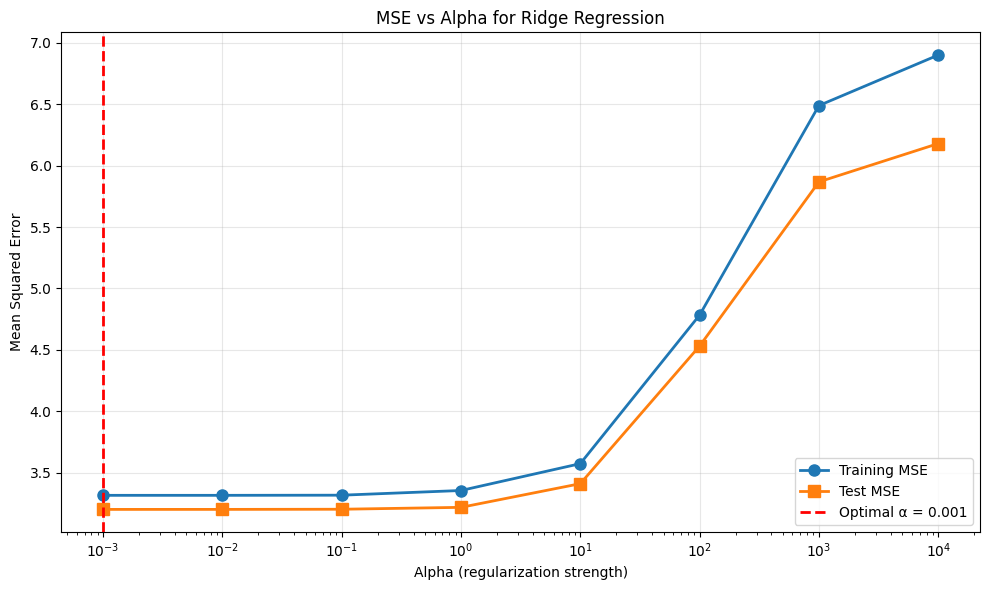

MSE vs alpha plot saved!


In [15]:
# Plot MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, 'o-', label='Training MSE', linewidth=2, markersize=8)
plt.plot(alphas, test_errors, 's-', label='Test MSE', linewidth=2, markersize=8)
plt.axvline(optimal_alpha, color='red', linestyle='--', linewidth=2, label=f'Optimal α = {optimal_alpha}')
plt.xscale('log')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha for Ridge Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/mse_vs_alpha.png', dpi=150)
plt.show()

print("MSE vs alpha plot saved!")

## Step 9: Parity Plot (True vs Predicted)

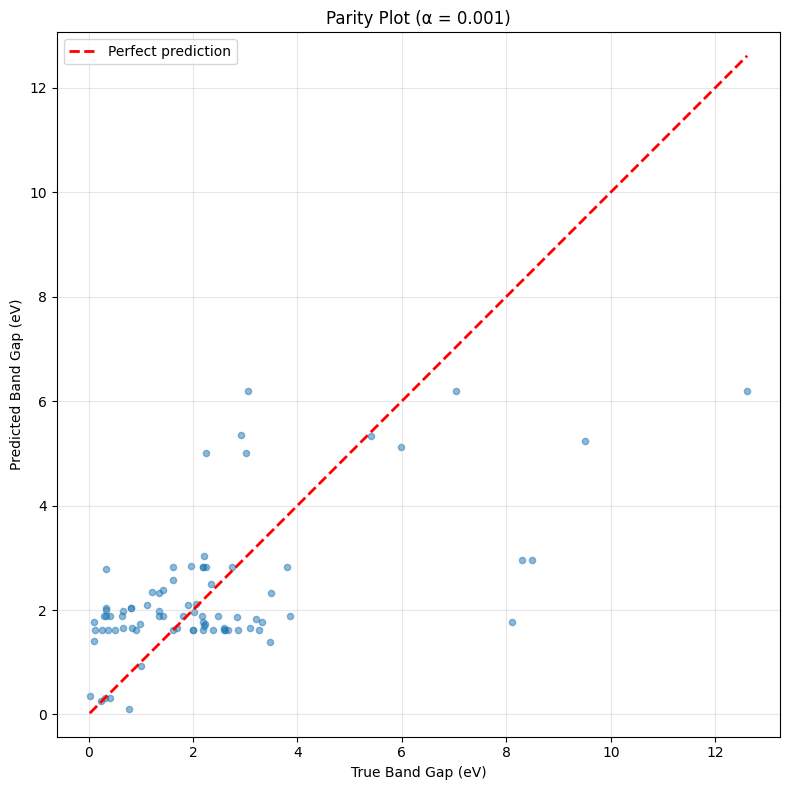

Parity plot saved!


In [16]:
# Get predictions using optimal alpha
optimal_weights = models[optimal_alpha]
y_test_pred_optimal = predict(X_test, optimal_weights)

# Create parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_optimal, alpha=0.5, s=20)

# Add perfect prediction line
min_val = min(y_test.min(), y_test_pred_optimal.min())
max_val = max(y_test.max(), y_test_pred_optimal.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')

plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
plt.title(f'Parity Plot (α = {optimal_alpha})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.savefig('../results/figures/parity_plot.png', dpi=150)
plt.show()

print("Parity plot saved!")

## Step 10: Calculate Additional Metrics

In [18]:
# Calculate R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Calculate MAE
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

r2 = r_squared(y_test, y_test_pred_optimal)
mae = mean_absolute_error(y_test, y_test_pred_optimal)

print("Performance Metrics for Optimal Model:")
print("="*50)
print(f"Alpha: {optimal_alpha}")
print(f"Test MSE: {optimal_test_mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print("="*50)

Performance Metrics for Optimal Model:
Alpha: 0.001
Test MSE: 3.2007
Test MAE: 1.2403
Test R²: 0.3717


## Analysis and Conclusions

### How well does ridge regression perform?

Based on the results, ridge regression performs moderately but not great on this dataset:

- **Test MSE of 3.20** means our predictions are off by about 1.8 eV on average (square root of MSE), which is pretty significant for band gap values
- **Test MAE of 1.24 eV** confirms substantial prediction errors
- **R² of 0.37** is the most telling metric - our model only explains 37% of the variance in band gap values. This means 63% of the variation in band gap can't be predicted by our features, which shows the model isn't capturing the underlying relationships very well
- The parity plot shows considerable scatter around the perfect prediction line, confirming that predictions are inconsistent
- Interestingly, the optimal alpha is 0.001 (very small regularization), and increasing alpha only makes performance worse. This suggests that overfitting isn't really the problem here

### What may be a bottleneck here?

Several factors are likely limiting our model's performance:

1. **Limited and weak features**: Looking back at the correlation matrix, none of our features showed strong correlations with band gap. We only have:
   - Crystallinity (single/polycrystalline)
   - Band gap type (direct/indirect/excitonic)
   - Experimental method
   - Temperature
   
   These features don't capture the actual physics and chemistry that determine band gap, like chemical composition, atomic structure, or electronic properties.

2. **Linear model limitations**: Ridge regression assumes linear relationships between features and the target. But band gap is determined by complex quantum mechanical properties that probably aren't linear with respect to our categorical features.

3. **Missing important information**: Band gap fundamentally depends on:
   - Chemical composition and elements involved
   - Crystal structure and lattice parameters
   - Electronic configuration
   - Material defects and impurities
   
   Our dataset doesn't include any of these crucial factors.

4. **Small dataset after filtering**: We only have about 400 data points after removing missing values, which might not be enough to capture all the complexity.

To improve the model, we would need either better features (especially chemical composition data) or more complex models that can capture non-linear relationships. The fact that minimal regularization works best suggests we're not dealing with overfitting but rather underfitting - we simply don't have the right information to make good predictions.